In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Performing EDA and getting to know the data better

<b>Loading the data and determining its shape</b>

In [2]:
dataframe = pd.read_csv('../Dataset/Development.csv')

In [3]:
dataframe.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'num_published_lectures',
       'num_published_practice_tests', 'created', 'published_time',
       'discount_price__amount', 'discount_price__currency',
       'price_detail__amount', 'price_detail__currency'],
      dtype='object')

In [4]:
dataframe.shape

(9932, 17)

In [5]:
dataframe.head(4)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency
0,567828,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/,True,1086954,4.56326,4.56743,4.56743,314098,152,0,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,455.0,INR,8640,INR
1,625204,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/,True,592474,4.64777,4.65291,4.65291,181621,405,0,2015-09-28T21:32:19Z,2015-11-02T21:13:27Z,455.0,INR,8640,INR
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/,True,687330,4.55210,4.54932,4.54932,131007,323,0,2016-09-05T09:54:22Z,2016-09-13T21:43:44Z,455.0,INR,8640,INR
3,756150,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/,True,417746,4.57687,4.58594,4.58594,128705,455,0,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,462.0,INR,8640,INR


<b>examining unwanted features/attributes in a table </b>

In [6]:
dataframe['discount_price__currency'].value_counts()

INR    9764
Name: discount_price__currency, dtype: int64

<b>Since The Currency is recorded in the format INR for every instance , we drop the currency spec columns from the dataframe and Rename the Data Columns by specifying the currency units. <b>

In [7]:
dataframe.drop(['price_detail__currency','discount_price__currency'],axis = 'columns',inplace = True)

<b>In the below cell ,we capture the missing values in a column 'price_detail__currency' , which implies that few samples have this feature mising </b> 

shape of dataframe after eliminating 2 dimensions (attributes)

In [8]:
dataframe.shape

(9932, 15)

In [9]:
dataframe.dtypes

id                                int64
title                            object
url                              object
is_paid                            bool
num_subscribers                   int64
avg_rating                      float64
avg_rating_recent               float64
rating                          float64
num_reviews                       int64
num_published_lectures            int64
num_published_practice_tests      int64
created                          object
published_time                   object
discount_price__amount          float64
price_detail__amount              int64
dtype: object

<b>YEAR-WISE COURSES OFFERED BY UDEMY</b>

* to find the no.of.courses offered every year in Udemy , we perform some preprocessing 
* extract the year from the date attribut

In [10]:
def extract_year(record):
    
    return pd.to_datetime(record,format='%Y-%m-%d').year

dataframe['year_created']=dataframe['created'].apply(extract_year)

dataframe['year_created'].head()

0    2015
1    2015
2    2016
3    2016
4    2015
Name: year_created, dtype: int64

Text(0.5, 1.0, 'Courses Offered By Udemy From 2011 - 2020')

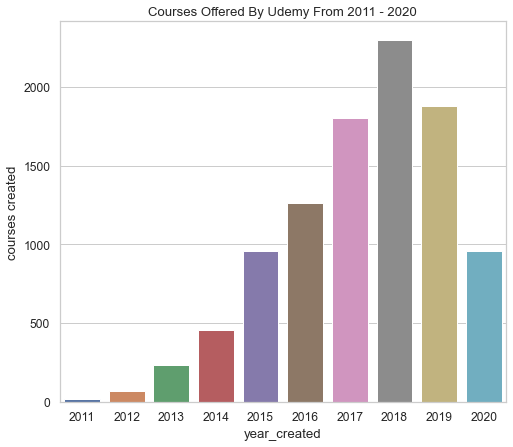

In [11]:
plt.figure(figsize=(8,7))
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
plot = sns.countplot(dataframe['year_created'])
plot.set_ylabel('courses created')
plot.set_title('Courses Offered By Udemy From 2011 - 2020')

# Impact created by pandemic in 2020 on the courses offered by Udemy

* We'll perform a drill down operation and look into the courses offered per month for the year 2020 .


In [12]:
def extract_month(record):
    
    return pd.to_datetime(record,format='%Y-%m-%d').month

courses_per_month_2020 = dataframe[dataframe['year_created']==2020]

courses_per_month_2020['month_created'] = courses_per_month_2020['created'].apply(extract_month)

Text(0.5, 1.0, 'Courses offered in the Year 2020 : A drill down Operation')

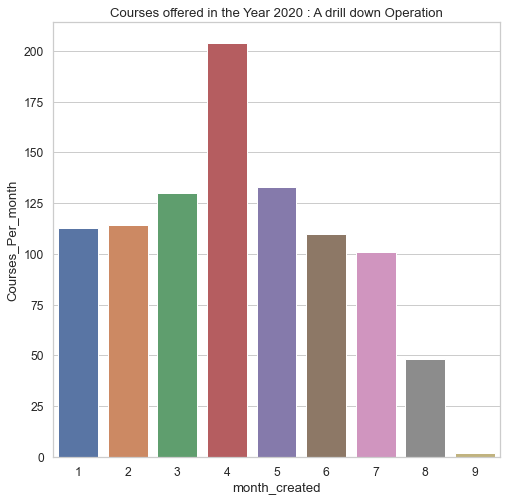

In [13]:
plt.figure(figsize=(8,8))
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
plot2=sns.countplot(courses_per_month_2020['month_created'])
plot2.set_ylabel('Courses_Per_month')
plot2.set_title('Courses offered in the Year 2020 : A drill down Operation')

<b>Key observation :
    
        *Notice that the no.of.courses created in the month of April reflects a spike 
        *Since the data is hierarchical , a drill down operation was possible
</b>



<b>How many paid courses veruse non-paid courses</b>


In [14]:
dataframe['is_paid'].value_counts()

True    9932
Name: is_paid, dtype: int64

# correlation between the features of the course statistics

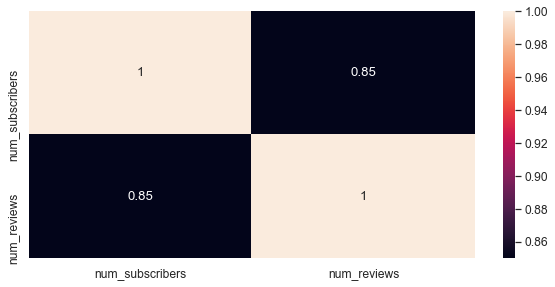

In [15]:
plt.figure(figsize=(10,10))

to_correlate = dataframe[['num_subscribers','num_reviews']]

plt.subplot(2, 1, 1)
sns.heatmap(to_correlate.corr(),annot=True)





<b> The observation is that num_reviews received  by a course and the total no.of.subscribers for a course are highly correlated!! </b>

Correlation between all numerical parameters in the dataframe is seen below

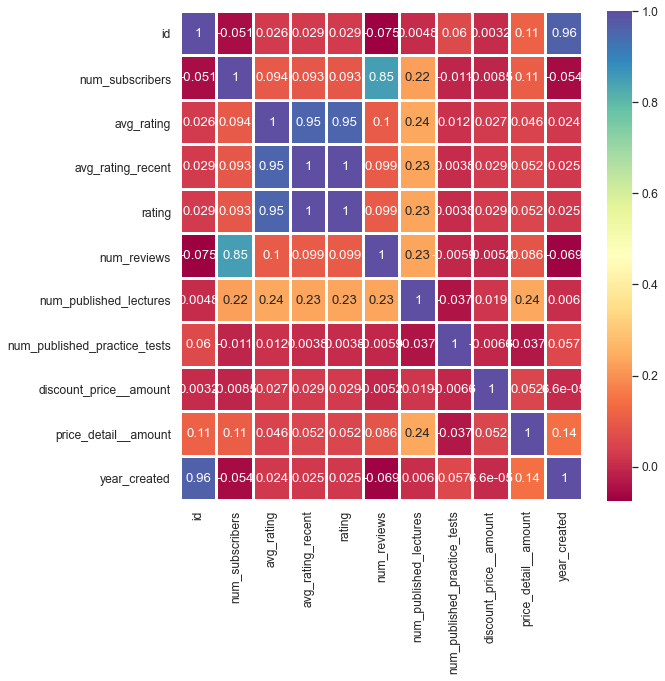

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(dataframe.drop('is_paid',axis=1).corr(),annot=True,fmt = '.2g' ,linecolor='white',linewidths=2,cmap='Spectral')

<b>The above plot shows correlation between all the paremeters/attributes.Typically num_reviews is highly correlated with the num_subscribers for that course. </b>

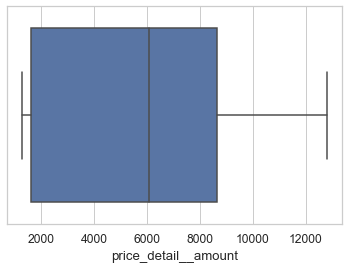

In [17]:
sns.boxplot(dataframe['price_detail__amount'])

<b> Visualizing the distribution of a feature variable viz 'num_published_lectures' </b>

Text(700, 0.008, 'Skewness : 3.500')

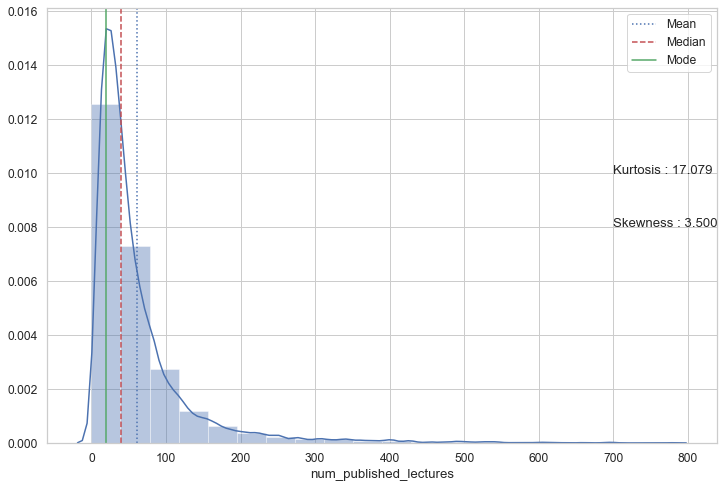

In [18]:
plt.figure(figsize=(12,8))
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
sns.distplot(dataframe['num_published_lectures'],bins=20)
plt.axvline(np.mean(dataframe['num_published_lectures']),color='b', linestyle=':')
mode = stats.mode(dataframe['num_published_lectures'])
plt.axvline(np.median(dataframe['num_published_lectures']),color='r', linestyle='--')
plt.axvline(mode[0],color='g', linestyle='-')
plt.legend({'Mean':dataframe['num_published_lectures'].mean(),'Median':dataframe['num_published_lectures'].median(),'Mode':mode[0]})
plt.text(700,0.010,"Kurtosis : 17.079")
plt.text(700,0.008,"Skewness : 3.500")


<b>From the above distribution we can see that the num_published_lectures is a right skewed distribution! 
Mode < Median < Mean </b>

<b>WHat were the most subscribed courses in every year from 2011-2020</b>

In [19]:
max_subs_per_year = dataframe.groupby('year_created')['num_subscribers'].transform(max) == dataframe['num_subscribers']

In [20]:
dataframe[max_subs_per_year][['title','num_subscribers','year_created']].sort_values('year_created')

,title,num_subscribers,year_created
328,Become a Web Developer from Scratch,70926,2011
240,The Complete 2020 Fullstack Web Developer Course,81732,2012
73,Learn HTML5 Programming From Scratch,317673,2013
9,Complete C# Unity Game Developer 2D,362891,2014
0,2020 Complete Python Bootcamp: From Zero to He...,1086954,2015
2,Machine Learning A-Z™: Hands-On Python & R In ...,687330,2016
126,The Complete Front-End Web Development Course!,308895,2017
10,The Data Science Course 2020: Complete Data Sc...,320039,2018
159,Java Programming: Complete Beginner to Advanced,233336,2019
299,Python for beginners - Learn all the basics of...,106128,2020


# Let's create a word cloud to visualize the most common courses and find out the most trending topics and buzzwords in IT_Development courses

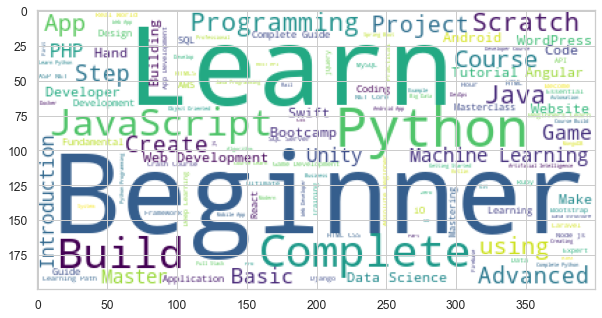

In [21]:
from wordcloud import WordCloud,STOPWORDS

def title_wordcloud(titles):
    
    stop = set(STOPWORDS)
    
    additional_stopwords = ['Complete','Beginner','using','Advanced','create','step']
    
    for i in additional_stopwords:
        stop.add(i)
    
    
    
    wc = WordCloud(background_color='white',max_words=200).generate(titles)
    
    plt.figure(figsize=(10,10))
    
    plt.imshow(wc)
    
    

string_of_words = " "
titles_list = list(dataframe['title'].values)
string_of_words = string_of_words.join(titles_list)
title_wordcloud(string_of_words)

Data Inconsistencies

In [22]:
dataframe.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,year_created
count,9.932000e+03,9.932000e+03,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9932.000000,9764.000000,9932.000000,9932.000000
mean,1.579035e+06,7.410613e+03,4.072721,4.055958,4.055958,687.041986,61.520842,0.037857,466.730234,5254.321385,2017.303061
std,8.361819e+05,2.589134e+04,0.496794,0.523469,0.523469,5450.095041,71.216428,0.350750,146.976860,3112.627009,1.815079
min,8.082000e+03,2.000000e+01,1.400000,1.337300,1.337300,8.000000,0.000000,0.000000,455.000000,1280.000000,2011.000000
25%,9.287770e+05,3.750000e+02,3.800000,3.774955,3.774955,24.000000,22.000000,0.000000,455.000000,1600.000000,2016.000000
50%,1.537401e+06,1.731000e+03,4.175220,4.166985,4.166985,60.000000,39.000000,0.000000,455.000000,6080.000000,2018.000000
75%,2.242264e+06,5.739000e+03,4.437500,4.438873,4.438873,212.000000,72.000000,0.000000,455.000000,8640.000000,2019.000000
max,3.473846e+06,1.086954e+06,5.000000,5.000000,5.000000,314098.000000,779.000000,6.000000,3200.000000,12800.000000,2020.000000


<b>We can clearly see that for discount_price__amount column we have less numeric values than the original column length.
Which Indicates we may have some inconsistency in the data , the data is missing </b>

<b>From Below we can infer that we have around 168 NaN values in the dataset column of discount_price__amount </b>

In [23]:
dataframe['discount_price__amount'].isnull().sum()

168

<b>How To Fix this or How to clean this data

We can see that the data objects having NaN value for discount_price_amount have a definite/consistent/non-null value for price_detail__amount. Hence we can possibly say that , such courses aren't available at a discounted_price .We can fill the missing values with their corresponding actual prices</b>

<b>Outlier Detection in price of the offered courses </b>

Z-score approach to detect outliers

if z score of the attribute for a  data object is >3 or < -3 , we mark them as outliers

In [24]:
z_scores = np.abs(stats.zscore(dataframe['price_detail__amount']))

In [25]:
outliers = z_scores[z_scores > 3]

In [26]:
outliers

array([], dtype=float64)

Empty list indicatses that we have no outliers in the price_detail__amount attribute 

# Data Integration , merging of 2 tables by altering the schema in an appropriate fashion ##

Till now , we handled only the dataset concerning the Development courses . A similar dataset has been identified by us for the CS - IT courses offered by Udemy , we shall perform some minor EDA and then clean it and further proceed on to merging the tables.

In [27]:
dataframe2 = pd.read_csv('CS_IT.csv')

In [28]:
dataframe2.shape

(22853, 20)

In [29]:
dataframe2.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')

In [30]:
dataframe.shape

(9932, 16)

In [31]:
dataframe.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,year_created
0,567828,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/,True,1086954,4.56326,4.56743,4.56743,314098,152,0,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,455.0,8640,2015
1,625204,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/,True,592474,4.64777,4.65291,4.65291,181621,405,0,2015-09-28T21:32:19Z,2015-11-02T21:13:27Z,455.0,8640,2015
2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/,True,687330,4.55210,4.54932,4.54932,131007,323,0,2016-09-05T09:54:22Z,2016-09-13T21:43:44Z,455.0,8640,2016
3,756150,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/,True,417746,4.57687,4.58594,4.58594,128705,455,0,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,462.0,8640,2016
4,533682,Java Programming Masterclass for Software Deve...,/course/java-the-complete-java-developer-course/,True,497195,4.56571,4.57203,4.57203,122306,400,0,2015-06-21T20:25:56Z,2015-07-21T22:01:13Z,455.0,8640,2015


In [32]:
dataframe2.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [33]:
dataframe2['discount_price__currency'].value_counts()

INR    21024
Name: discount_price__currency, dtype: int64

In [34]:
21024+1829

22853

In [35]:
dataframe2.drop(['price_detail__currency','discount_price__currency','price_detail__price_string','is_wishlisted'],axis = 'columns',inplace = True)

In [36]:
dataframe2.shape

(22853, 16)

In [37]:
dataframe2.drop('discount_price__price_string',axis = 'columns',inplace = True)

In [38]:
dataframe2['year_created']=dataframe2['created'].apply(extract_year)

In [39]:
dataframe2

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,year_created
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0,2016
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0,2016
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0,2017
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,8640.0,2015
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,8640.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22848,1516977,Fundamental Service Oriented Arch (SOA) Securi...,/course/fundamental-service-oriented-arch-soa-...,True,16,3.25000,2.65702,2.65702,2,0,2,2018-01-19T09:03:46Z,2018-01-28T09:20:37Z,455.0,1280.0,2018
22849,1479824,Linux Certification for Experts - Practice Tes...,/course/linux-certification-for-beginners-prac...,True,15,4.00000,3.56818,3.56818,2,0,2,2017-12-23T12:44:39Z,2017-12-24T07:38:36Z,455.0,1280.0,2017
22850,1879598,SAP SuccessFactors Employee Central Payroll Fu...,/course/public-transport-management-systems/,True,19,2.75000,2.70354,2.70354,2,5,0,2018-08-27T14:43:42Z,2018-09-19T23:19:18Z,NaN,1280.0,2018
22851,1940616,Comptia Linux+ / LPIC-1 (102-400),/course/comptia-linux-lpic-1-102-400/,True,1082,3.75000,3.72059,3.72059,2,31,0,2018-09-30T15:11:27Z,2018-12-11T16:22:32Z,455.0,1280.0,2018


In [40]:
common_courses = set(dataframe['id'].values) & set(dataframe2['id'].values)

In [41]:
dataframe.shape

(9932, 16)

In [42]:
common_id = set(dataframe['id'].values) & set(dataframe2['id'].values)

In [43]:
indices =[]

for x in common_id:
    b=dataframe[dataframe['id'] == x].index
    indices.append(b[0])
    

In [44]:
dataframe.shape

(9932, 16)

In [45]:
indices[0]

8583

In [46]:
dataframe_after_drop=dataframe.drop(dataframe.index[indices],axis =0,)

In [47]:
dataframe.shape

(9932, 16)

In [48]:
dataframe_after_drop.shape

(9898, 16)

In [49]:
set(dataframe_after_drop['id'].values) & set(dataframe2['id'].values)

set()

In [50]:
Merged_data = pd.concat([dataframe_after_drop,dataframe2],ignore_index=True)

In [51]:
Merged_data.reset_index()

,index,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,year_created
0,0,567828,2020 Complete Python Bootcamp: From Zero to He...,/course/complete-python-bootcamp/,True,1086954,4.56326,4.56743,4.56743,314098,152,0,2015-07-29T00:12:23Z,2015-10-12T21:42:53Z,455.0,8640.0,2015
1,1,625204,The Web Developer Bootcamp,/course/the-web-developer-bootcamp/,True,592474,4.64777,4.65291,4.65291,181621,405,0,2015-09-28T21:32:19Z,2015-11-02T21:13:27Z,455.0,8640.0,2015
2,2,950390,Machine Learning A-Z™: Hands-On Python & R In ...,/course/machinelearning/,True,687330,4.55210,4.54932,4.54932,131007,323,0,2016-09-05T09:54:22Z,2016-09-13T21:43:44Z,455.0,8640.0,2016
3,3,756150,Angular - The Complete Guide (2020 Edition),/course/the-complete-guide-to-angular-2/,True,417746,4.57687,4.58594,4.58594,128705,455,0,2016-02-08T17:02:55Z,2016-02-11T07:29:29Z,462.0,8640.0,2016
4,4,533682,Java Programming Masterclass for Software Deve...,/course/java-the-complete-java-developer-course/,True,497195,4.56571,4.57203,4.57203,122306,400,0,2015-06-21T20:25:56Z,2015-07-21T22:01:13Z,455.0,8640.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32746,32746,1516977,Fundamental Service Oriented Arch (SOA) Securi...,/course/fundamental-service-oriented-arch-soa-...,True,16,3.25000,2.65702,2.65702,2,0,2,2018-01-19T09:03:46Z,2018-01-28T09:20:37Z,455.0,1280.0,2018
32747,32747,1479824,Linux Certification for Experts - Practice Tes...,/course/linux-certification-for-beginners-prac...,True,15,4.00000,3.56818,3.56818,2,0,2,2017-12-23T12:44:39Z,2017-12-24T07:38:36Z,455.0,1280.0,2017
32748,32748,1879598,SAP SuccessFactors Employee Central Payroll Fu...,/course/public-transport-management-systems/,True,19,2.75000,2.70354,2.70354,2,5,0,2018-08-27T14:43:42Z,2018-09-19T23:19:18Z,NaN,1280.0,2018
32749,32749,1940616,Comptia Linux+ / LPIC-1 (102-400),/course/comptia-linux-lpic-1-102-400/,True,1082,3.75000,3.72059,3.72059,2,31,0,2018-09-30T15:11:27Z,2018-12-11T16:22:32Z,455.0,1280.0,2018


In [52]:
#Merged_data.to_csv('Integrated_CS_IT_DEV.csv')